# Exercise 1 : 
## Question 2 :

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math
n = 10**6    # number of samples

Méthode 1 

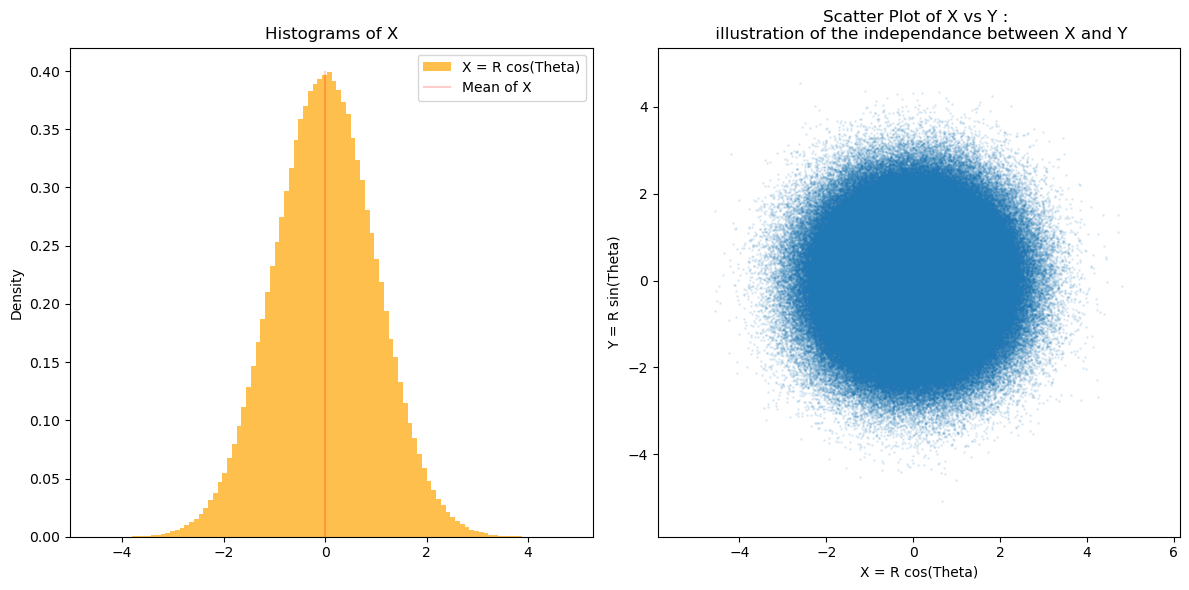

In [30]:
def sample_raleigh(number_samples):
    U = np.random.uniform(low = 0, high = 1, size = number_samples)
    return np.sqrt(-2 * np.log(1 - U))

sigma = 1    # parameter for the Raleigh distribution
samples_raleigh = np.random.rayleigh(scale = 1, 
                                     size = n)    # generate samples of the Raleigh distribution
samples_uniform = np.random.uniform(low = 0, 
                                    high = 2 * math.pi, 
                                    size = n)    # generate samples of the uniform distribution
X , Y = samples_raleigh * np.cos(samples_uniform), samples_raleigh * np.sin(samples_uniform)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

Méthode 2

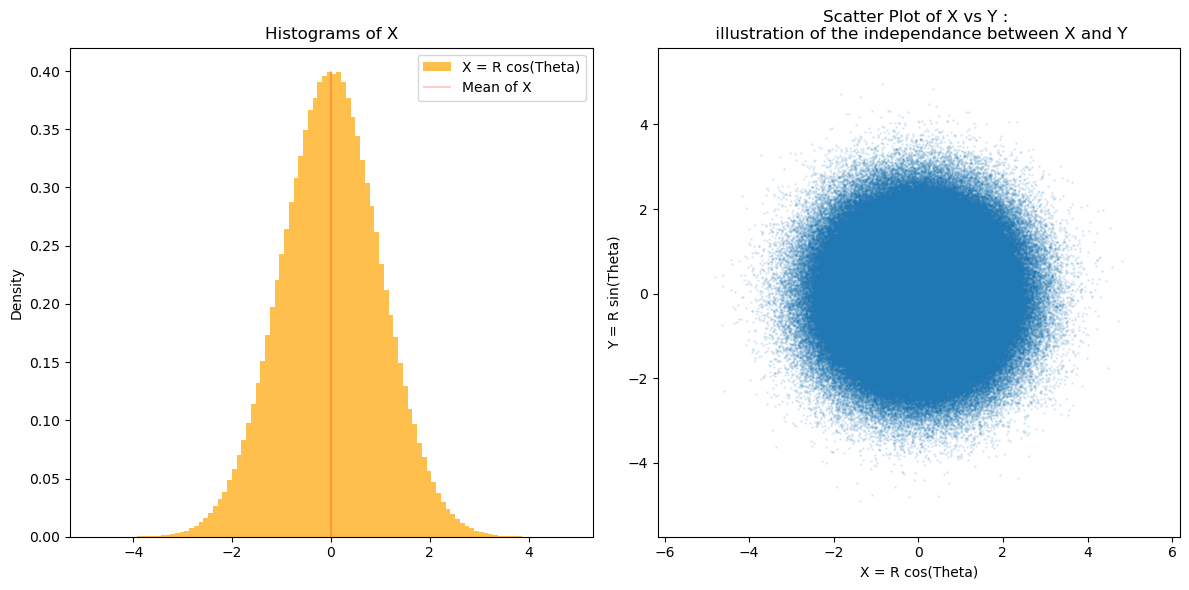

In [13]:
def sample_raleigh(number_samples):
    U = np.random.uniform(low = 0, high = 1, size = number_samples)
    return np.sqrt(-2 * np.log(1 - U))

samples_raleigh = sample_raleigh(n)    # generate samples of the Raleigh distribution
samples_uniform = np.random.uniform(low = 0, 
                                    high = 2 * math.pi, 
                                    size = n)    # generate samples of the uniform distribution
X , Y = samples_raleigh * np.cos(samples_uniform), samples_raleigh * np.sin(samples_uniform)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

The scatter plot allows us to visualize the points $(X,Y)$. There is no discernible pattern and the points are distributed randomly, it indicates that X and Y are independent.

## Question 3:

### c.

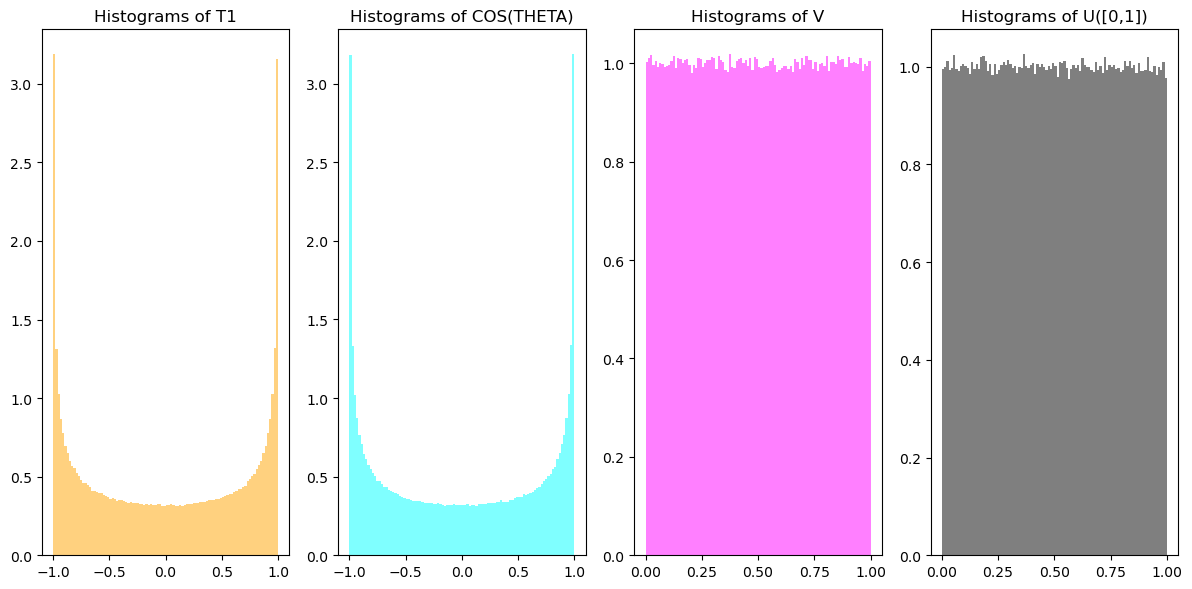

In [26]:
def condition_Marsaglia_Bray_algorithm(number_of_sample):
    sample = []
    for _ in range(number_of_sample):
        while True:
            U1 = np.random.uniform(low = -1, high = 1)
            U2 = np.random.uniform(low = -1, high = 1)
            V1 , V2 = 2 * U1 - 1, 2 * U2 - 1
            if V1 ** 2 + V2 ** 2 <= 1:
                break
        sample.append([V1, V2])
    sample = np.array(sample)
    return sample[:, 0], sample[:, 1]

V1, V2 = condition_Marsaglia_Bray_algorithm(n)    #sample V1 and V2
THETA = np.random.uniform(low = 0, high = 2 * math.pi, size = n)    # sample theta
cos_THETA = np.cos(THETA)
T1 = V1 / (np.sqrt(V1 ** 2 + V2 ** 2))    # sample T1
V = V1 ** 2 + V2 ** 2    # sample V
U = np.random.uniform(low = 0, high = 1, size = n)    # sample U

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.hist(T1, bins = 100, density = True, alpha = 0.5, color='orange')
plt.title('Histograms of T1')
plt.subplot(1, 4, 2)
plt.hist(cos_THETA, bins = 100, density = True, alpha = 0.5, color='cyan')
plt.title('Histograms of COS(THETA)')
plt.subplot(1, 4, 3)
plt.hist(V, bins = 100, density = True, alpha = 0.5, color='magenta')
plt.title('Histograms of V')
plt.subplot(1, 4, 4)
plt.hist(U, bins = 100, density = True, alpha = 0.5, color='black')
plt.title('Histograms of U([0,1])')
plt.tight_layout()
plt.show()

### d.

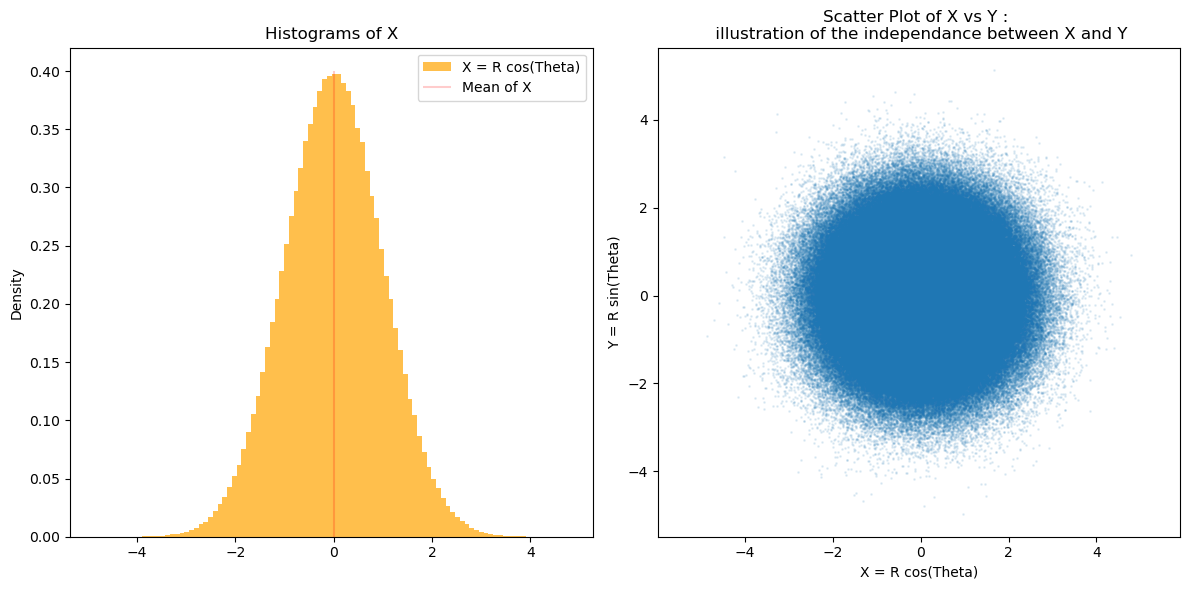

In [27]:
def algorithm1(number_of_samples):
    V1, V2 = condition_Marsaglia_Bray_algorithm(number_of_samples)    # Generate V1 and V2
    SUM = V1 ** 2 + V2 **2
    S = np.sqrt(- 2 * np.log(SUM))
    X, Y = S * (V1 / np.sqrt(SUM)), S * (V2 / np.sqrt(SUM))
    return X, Y

X , Y = algorithm1(n)    # generate indepent normal distribution 

# plot the samples
plt.figure(figsize=(12, 6))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X, bins = 100, density = True, alpha = 0.7, color = 'orange', label = 'X = R cos(Theta)')
plt.vlines(x = X.mean(), ymin = 0, ymax = 0.40, color = 'red', label = 'Mean of X', alpha = 0.2)
#plt.hist(Y, bins=100, density=True, alpha=0.7, color='orange', label='Y = R sin(Theta)')
plt.title('Histograms of X')
plt.ylabel('Density')
plt.legend()

# Scatter plot for X vs Y
plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, s=1)  
plt.title('Scatter Plot of X vs Y : \n illustration of the independance between X and Y')
plt.xlabel('X = R cos(Theta)')
plt.ylabel('Y = R sin(Theta)')
plt.axis('equal')  

plt.tight_layout()
plt.show()

# Exercise 2:

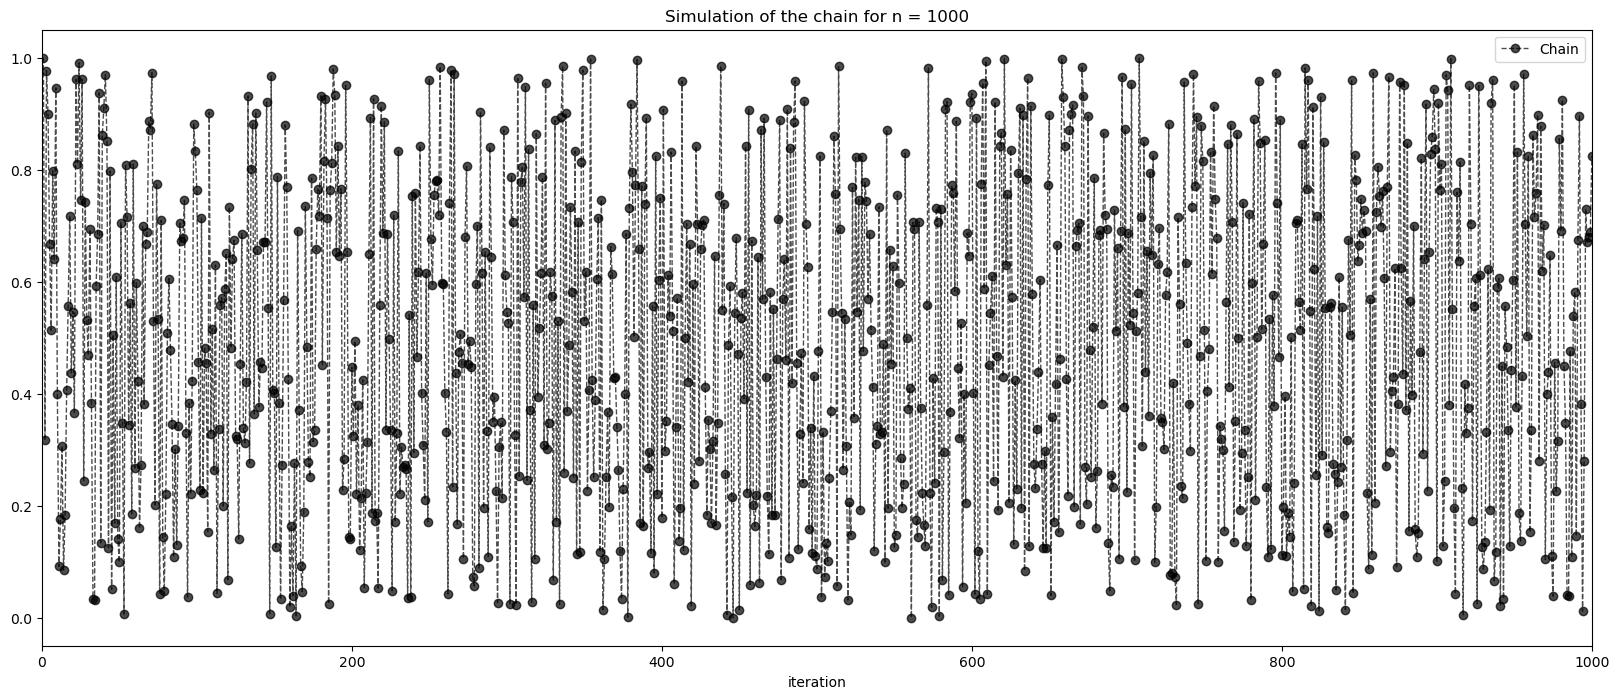

In [42]:
# Simulate the chain 
n = 10 ** 3
def simulate_chain(number_of_samples):
    X = [1]
    for k in range(1, number_of_samples):
        inverse = 1 / X[-1]
        if inverse.is_integer():
            U = np.random.uniform(low = 0, high = 1)
            if U < 1 - X[-1] ** 2:
                X.append(1 / (k+1))
            else:
                X.append(np.random.uniform(low = 0, high = 1))
        else:
            X.append(np.random.uniform(low = 0, high = 1))
    return X

X = simulate_chain(n)
plt.figure(figsize=(20, 8))
plt.plot(range(1, n + 1), X, color = 'black', alpha = 0.7, label = 'Chain', linewidth = 1, linestyle = '--', marker = 'o')    # markersize = 1, markerfacecolor = 'red', markeredgewidth = 1, markeredgecolor = 'blue', markevery = 1000)
plt.title(f'Simulation of the chain for n = {n}')
plt.xlabel('iteration')
plt.xlim(0, n)
plt.legend()
plt.show()